In [2]:
!pip install dmba

import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import dmba

%matplotlib inline

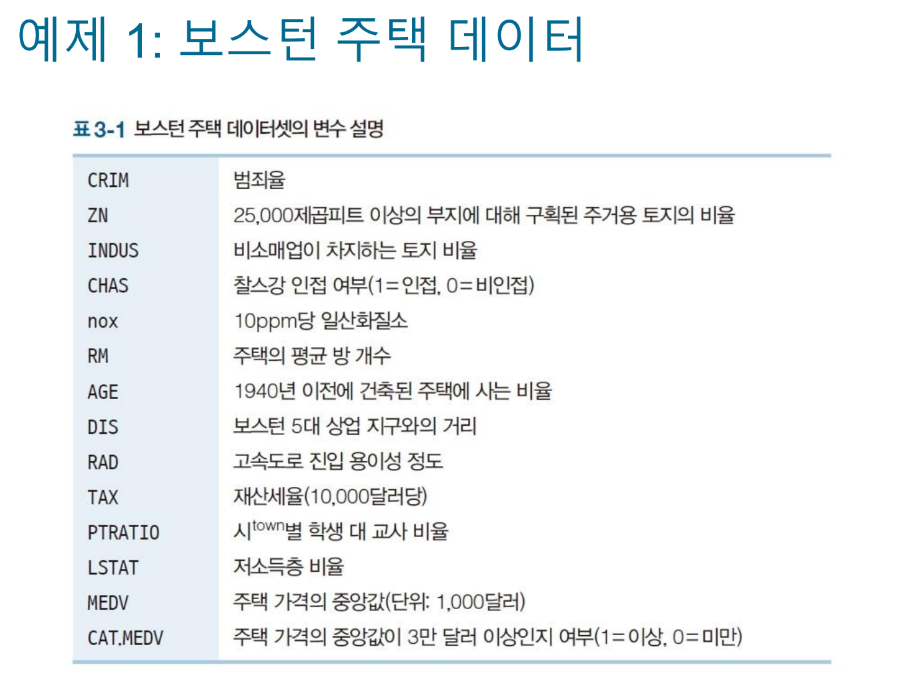

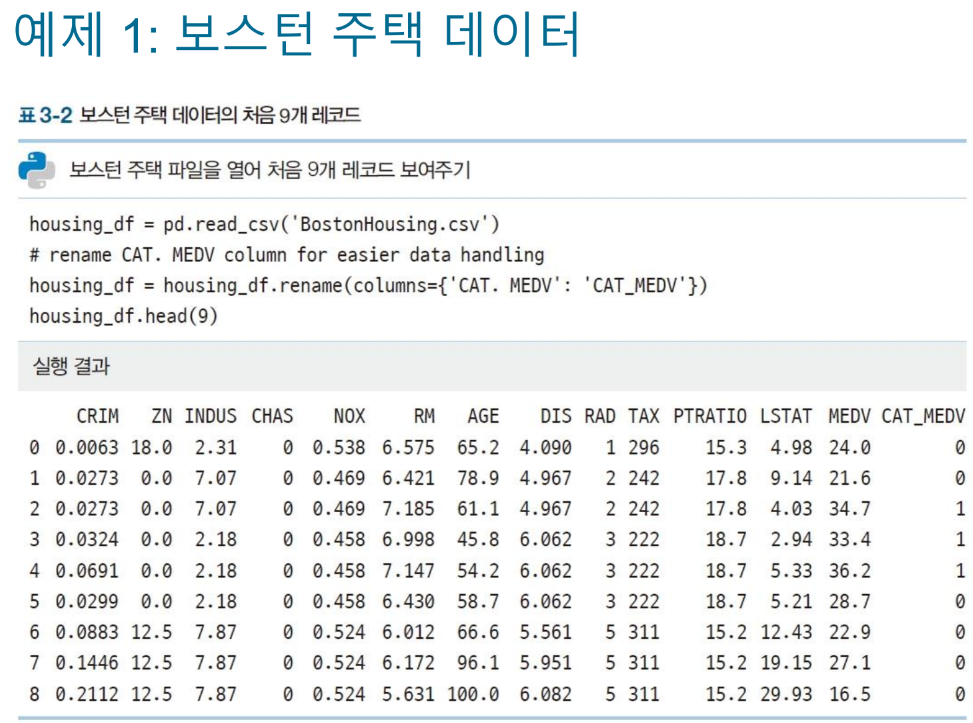

## 기본 차트: 막대그래프, 선그래프, 산점도
* 선그래프
    * 주로 시계열을 보여주는 데 사용
    * 그래프를 그리기 위한 시간 프레임의 크기는 시간 척도와 마찬가지로 예측 작업의 규모와 데이터의 속성에 따라 달라짐
* 막대 그래프
    * 평균, 개수, 비율과 같은 단일 통계값의 그룹별 비교에 유용
    * 막대 높이는 통계값을 나타내고, 각 막대는 그룹을 표시하며, 각 막대의 높이(수평 막대의 경우에는 길이)는 변수값을 나타냄
* 산점도
    * 수치형 변수 간의 관계를 보여주는 데 사용
    * 비지도학습에서 두 가지 수치형 변수 간의 정보 중복이나 군집 발견과 같은 연관성을 밝히는 데 도움이 됨

In [3]:
# Load the Amtrak data and convert them to be suitable  for time series analysis
Amtrak_df = dmba.load_data('Amtrak.csv')
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)

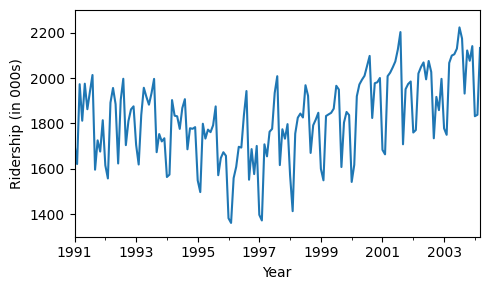

In [4]:
#선그래프
ridership_ts.plot(ylim=[1300, 2300], legend=False, figsize=[5, 3])
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label

plt.tight_layout()
plt.show()

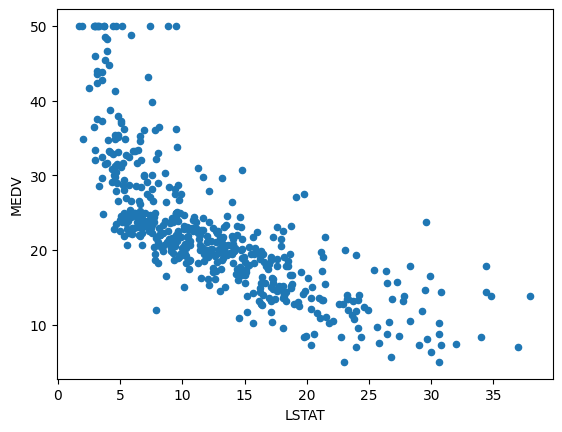

In [20]:
#산점도
housing_df = dmba.load_data('BostonHousing.csv')
# rename CAT. MEDV column for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)
plt.show()

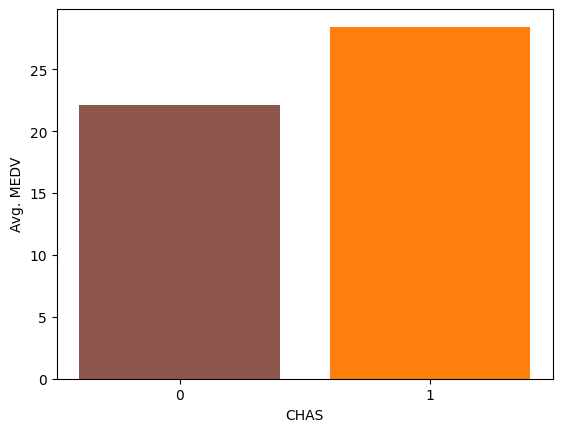

In [13]:
#수치형 변수에 대한 막대그래프
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1])
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')
plt.show()

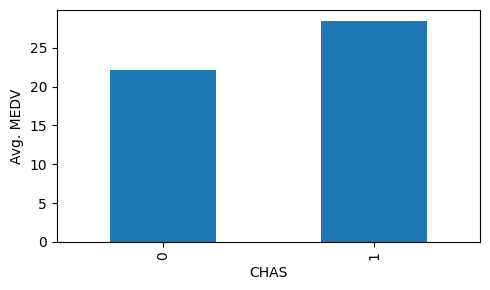

In [16]:
#범주형 변수에 대한 막대그래프
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Avg. MEDV')

plt.tight_layout()
plt.show()

### 분포도: 박스 플롯과 히스토그램
* 분포도
    * 수치형 변수의 전반적인 분포를 표시
    * 데이터마이닝 방법과 변수 변환을 결정하기 위한 지도 학습에 유용
* 박스플롯
    * 나란히 생성해 하위 그룹끼리 비교하거나, 여러 개의 박스 플롯을 시간별로 생성함으로써 시간 변화에 따른 분포를 관찰할 수 있음
* 히스토그램
    * 일련의 수직 연결된 막대로 모든 x값의 빈도를 나타냄

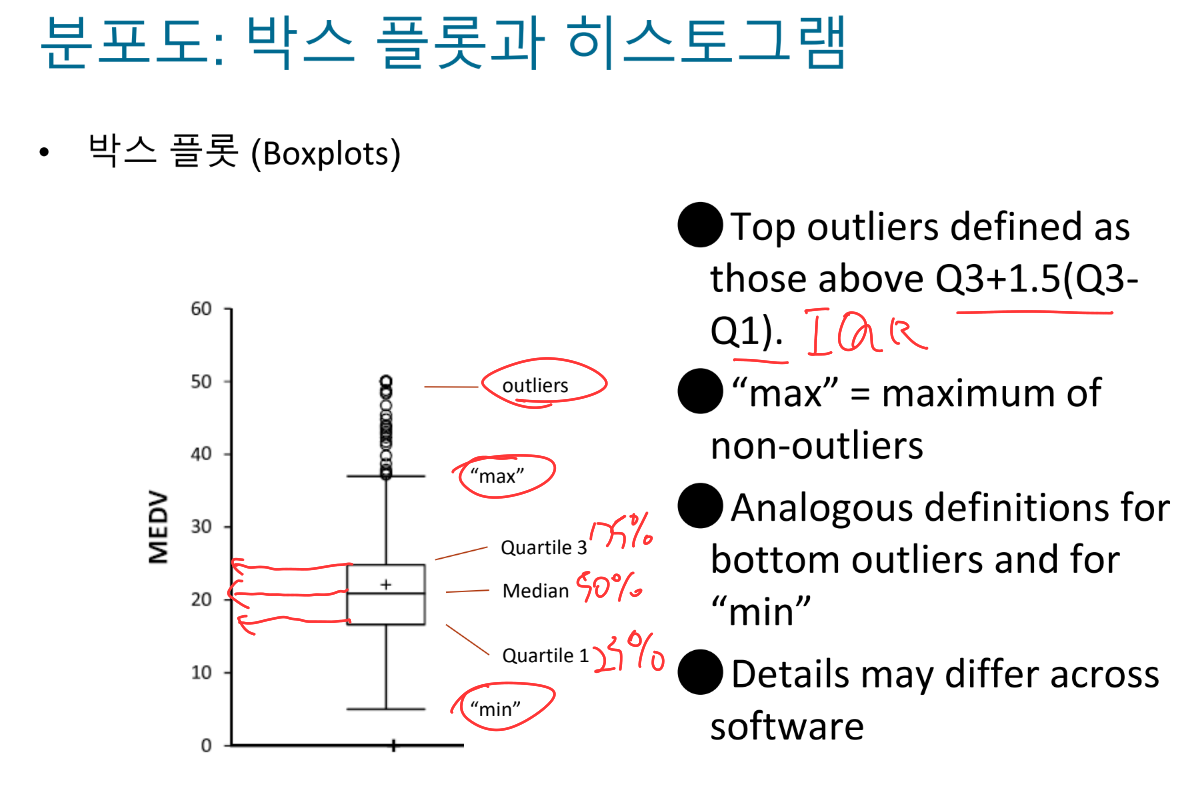

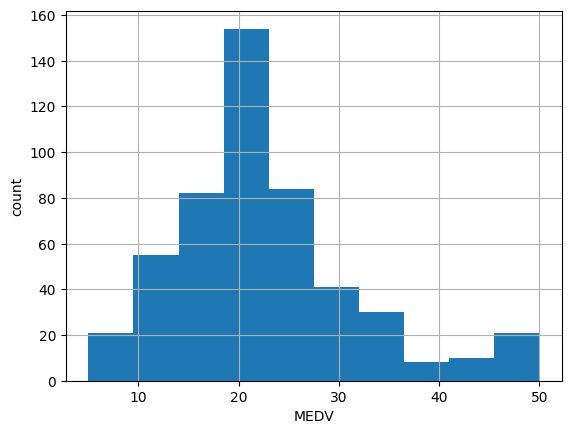

In [11]:
#histogram of MEDV
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV')
ax.set_ylabel('count')

plt.show()

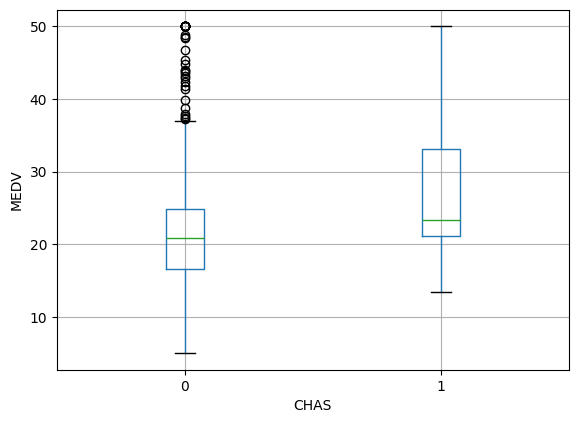

In [17]:
#boxplot of MEDV for different values of CHAS
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

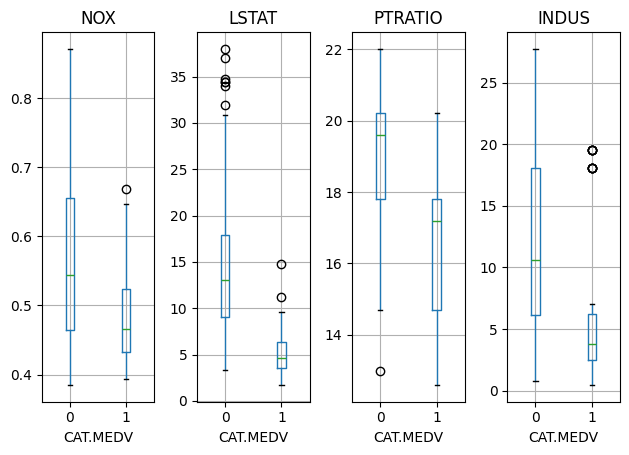

In [21]:
#분포도: 박스 플롯과 히스토그램
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT.MEDV')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

### 히트맵: 상관관계와 결측치 시각화
* 히트맵
    * 수치형 데이터를 그래픽으로 나타내는 차트이며, 값을 색상으로 표시
    * 상관관계표의 시각화와 결측치의 시각화에 특히 유용
    * p개의 변수에 대한 상관관계표는 p행\*p열이고 값보다는 색상을 살펴보는 것이 더 쉽고 빠름
    * 큰 숫자 값을 검토하는 데 유용하지만 색상 차이를 정확하게 인지하기 어려워 막대그래프와 같은 정확한 그래픽 시각화를 대체하진 못함

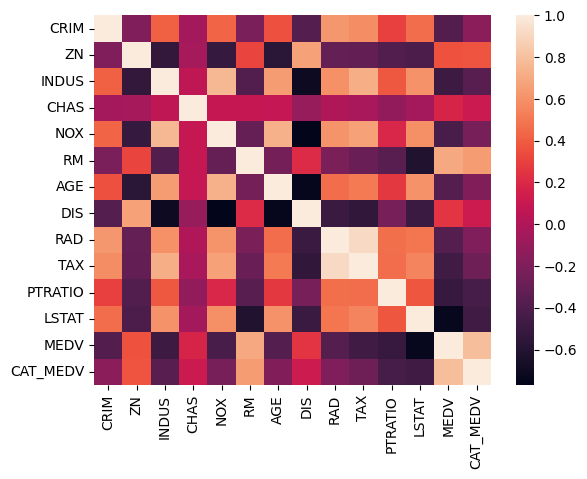

In [23]:
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

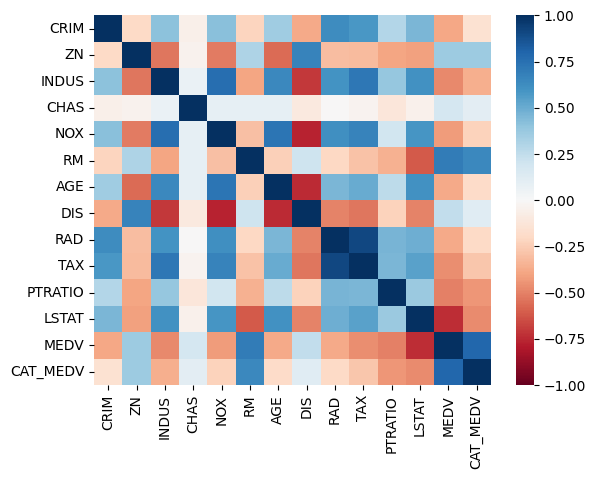

In [24]:
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")
plt.show()

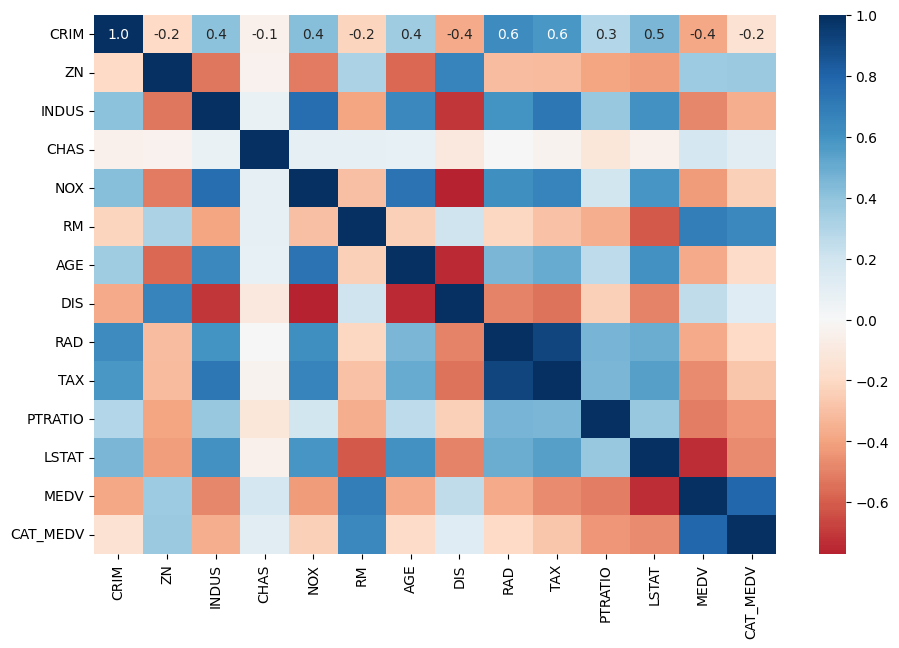

In [28]:
# Include information about values
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

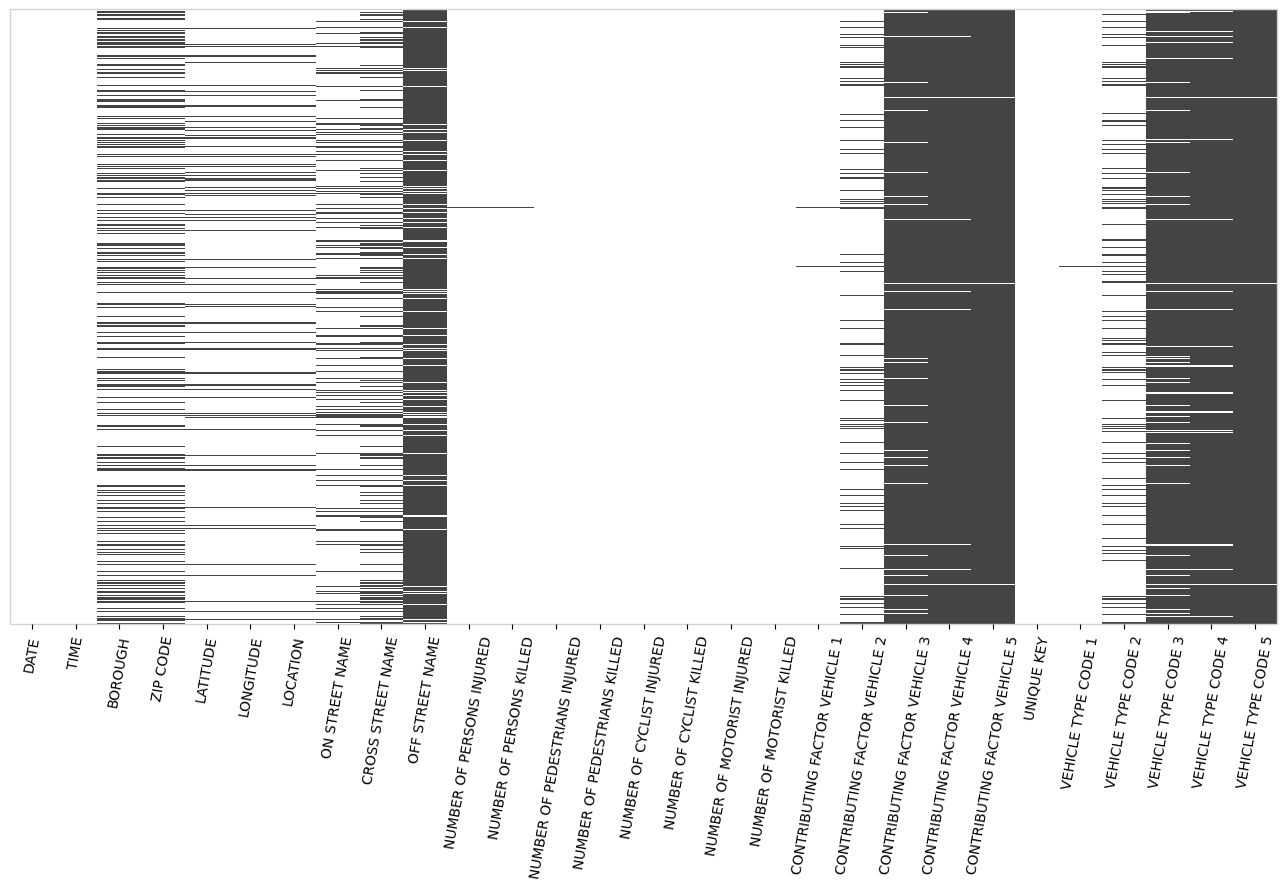

In [29]:
df = dmba.load_data('NYPD_Motor_Vehicle_Collisions_1000.csv').sort_values(['DATE'])

# Given a dataframe df create a copy of the array that is 0 if a field contains a value
# and 1 for NaN
naInfo = np.zeros(df.shape)
naInfo[df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#444444"], cbar=False, ax=ax)
ax.set_yticks([])

rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1,
                     edgecolor='lightgrey',facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

## 다차원 시각화
### 색상, 크기, 모양, 다중 패널, 애니메이션
* 차트 속성 변수 추가
    * 차트에 더 많은 변수를 포함하려면 먼저 변수 형태를 고려해야 함
    * 표시가 너무 많으면 어수선해 인지하기가 어려우므로 변수를 추가할 때는 신중해야 함
    * 범주형 정보를 추가하려면 색조, 모양, 다중 패널을 사용하는 것이 좋음
    * 수치 정보를 추가하려면 색상 강도를 조절하거나 크기 변화
    * 시간 정보가 어떻게 변화하는지는 차트에 시간 차원을 추가해 애니메이션을 통해 보여주는 것이 효과적(예: [www.gapminder.org](www.gapminder.org))

* 색상
    * 색상 코드는 수치 결과 변수(y축)와 수치 예측 변수 사이의 관계를 탐색하는 데 도움을 줌
    * 색상-코드화된 산점도는 상호작용하는 조건을 만들 필요가 있는지 평가하는 데 도움이 됨
    * 범주 수가 적은 경우 색상을 사용해 범주형 변수를 막대그래프에 추가. 범주 수가 많을 때는 다중 패널 사용. 다중 패널에서는 범주형 변수에 따라 관측 데이터를 분리하고, 별도의 차트로 작성

* 산점도 매트릭스
    * 다중 패널 산점도를 이용하는 특별한 차트
    * 비지도 학습에서는 수치형 변수들 간의 연관성 분석, 아웃라이어 탐지, 군집 식별 등에 유용
    * 지도 학습에서는 예측 변수들 간의 쌍별 관련성을 평가함으로써 변수 변환과 변수 선택에 도움
    * 예측 분야에서는 수치형 예측 변수와 결과 변수 관계를 서술하는 데 쓰임

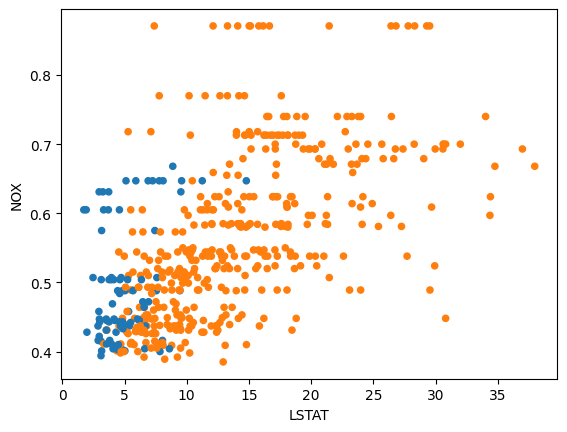

In [30]:
# Color the points by the value of CAT.MEDV
housing_df.plot.scatter(x='LSTAT', y='NOX',
                        c=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])
plt.show()

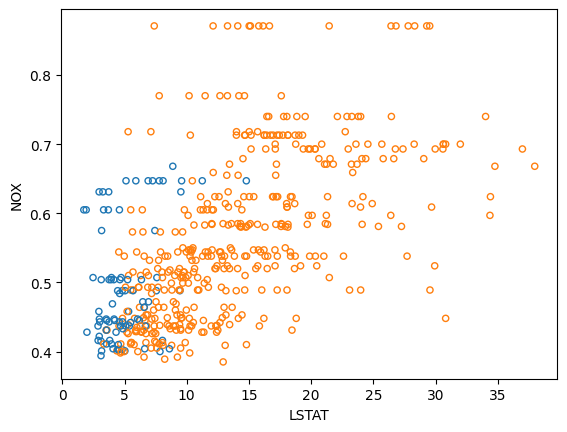

In [31]:
# Change the rendering of the points to open circles by controlling the color
housing_df.plot.scatter(x='LSTAT', y='NOX', color='none',
                        edgecolor=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])
plt.show()

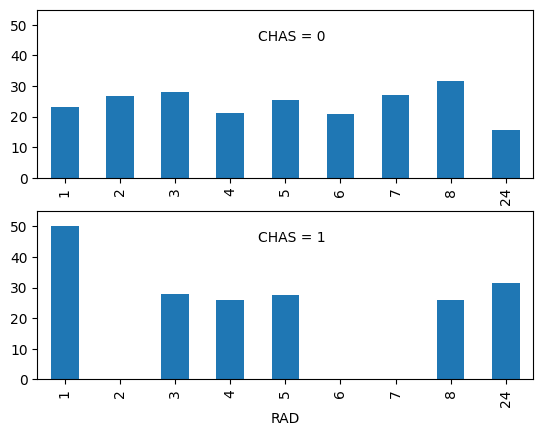

In [32]:
dataForPlot_df = housing_df.groupby(['CHAS','RAD']).mean()['MEDV']
# We determine all possible RAD values to use as ticks
ticks = set(housing_df.RAD)
for i in range(2):
    for t in ticks.difference(dataForPlot_df[i].index):
        dataForPlot_df.loc[(i, t)] = 0
# reorder to rows, so that the index is sorted
dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]

# Determine a common range for the y axis
yRange = [0, max(dataForPlot_df) * 1.1]

fig, axes = plt.subplots(nrows=2, ncols=1)
dataForPlot_df[0].plot.bar(x='RAD', ax=axes[0], ylim=yRange)
dataForPlot_df[1].plot.bar(x='RAD', ax=axes[1], ylim=yRange)
axes[0].annotate('CHAS = 0', xy=(3.5, 45))
axes[1].annotate('CHAS = 1', xy=(3.5, 45))

plt.show()

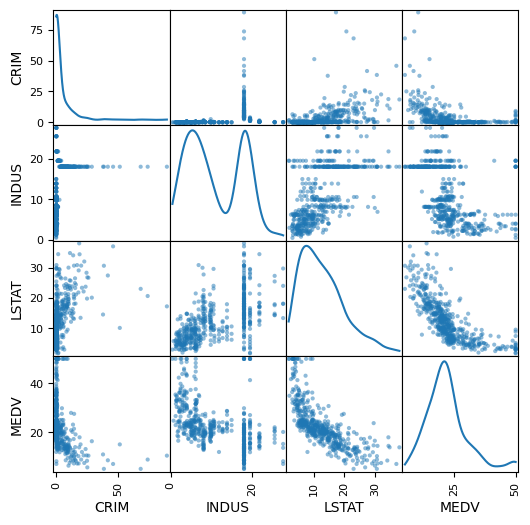

In [33]:
_ = scatter_matrix(housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']], figsize=(6, 6), diagonal='kde')

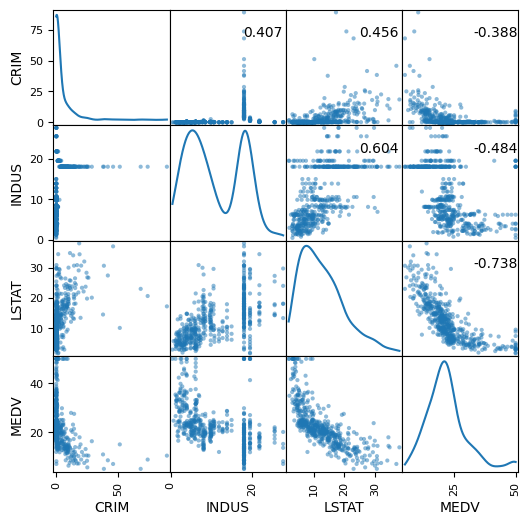

In [34]:
# Add the correlation coefficient to the scatterplots above the diagonal
df = housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']]
axes = scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='kde')
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

### 차트 조절: 스케일링, 집계와 계층 구조
* 스케일링, 집계와 계층 구조
    * 스케일, 집계, 계층을 달리하며 분석하면 다양한 수준의 패턴과 관계가 드러나고, 집중분석해야 하는 새로운 변수군 발견 가능
* 스케일링
    * 디스플레이의 축척을 변경하면 변수 간의 관계를 부각시킬 수 있음
    * 밀집 현상을 해소하고, 2개의 로그 스케일 변수간 선형 관계(로그-로그 관계)를 드러내줌
* 집계와 계층 구조
    * 집계의 수준을 변경하는 스케일링
    * 시계열 데이터에서 흔히 사용하는 집계 방법은 이동 평균
    * 비시간성 변수는 지리적 위치(보스턴 주택 예제의 우편번호별 주택), 조직도(부서 또는 부문의 인력)등 의미 있는 계층이 있다면 집계될 수 있다.

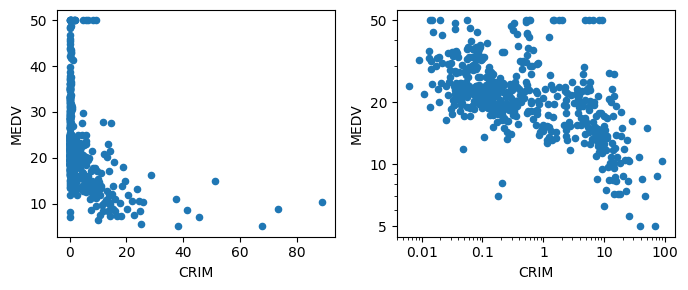

In [35]:
# Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])
# log scale
ax = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout()

plt.show()

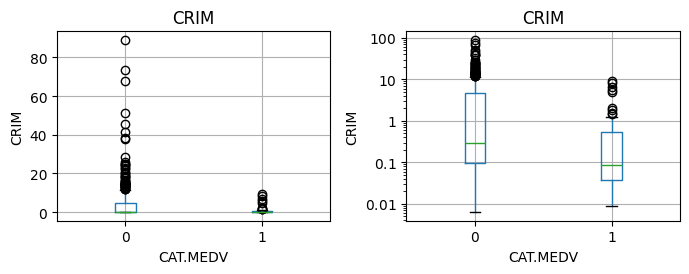

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# regular scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')

# log scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')
ax.set_yscale('log')

# suppress the title
axes[0].get_figure().suptitle('')
plt.tight_layout()

plt.show()

### 차트조절: 확대/축소와 패닝, 필터링
* 확대/축소와 패닝
    * 차트의 특정 영역을 확대 또는 축소, 확대/축소의 윈도를 다른 영역으로 이동(패닝)
    * 확대/축소와 패닝을 통해 새로운 상호작용 조건, 새로운 변수, 데이터 서브셋에 관한 별도 모델을 만들어낼 수 있음
* 필터링
    * 노이즈를 제거함으로써 특정 데이터에 관심을 집중하는 것

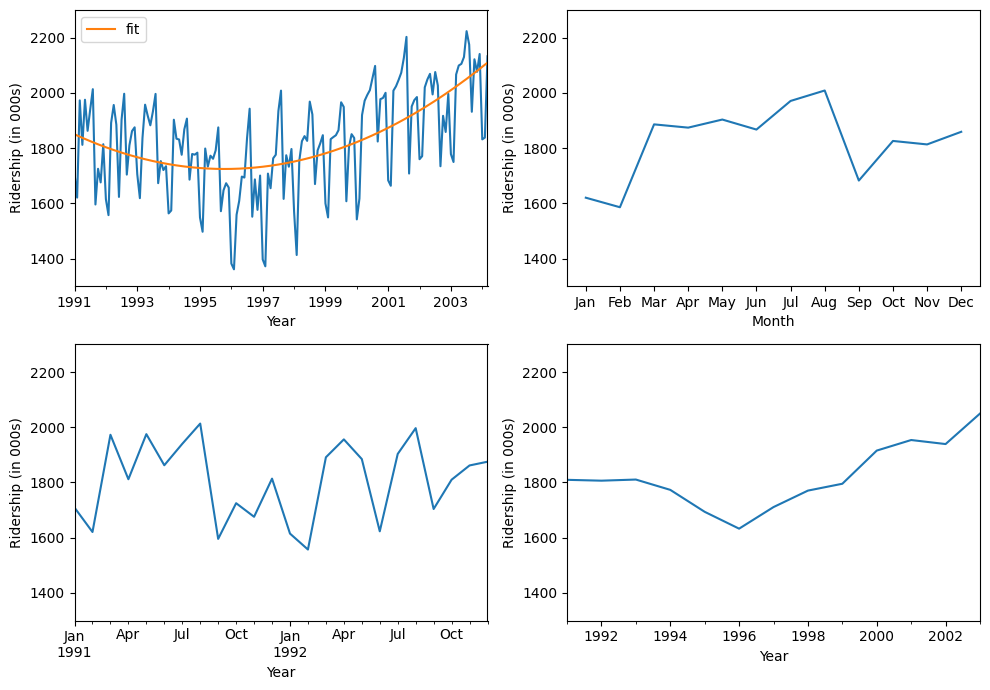

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))


Amtrak_df = dmba.load_data('Amtrak.csv')
Amtrak_df['Month'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df.set_index('Month', inplace=True)

# fit quadratic curve and display
quadraticFit = np.poly1d(np.polyfit(range(len(Amtrak_df)), Amtrak_df.Ridership, 2))
Amtrak_fit = pd.DataFrame({'fit': [quadraticFit(t) for t in range(len(Amtrak_df))]})
Amtrak_fit.index = Amtrak_df.index

ax = Amtrak_df.plot(ylim=[1300, 2300], legend=False, ax=axes[0][0])
Amtrak_fit.plot(ax=ax)
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

# Zoom in 2-year period 1/1/1991 to 12/1/1992
ridership_2yrs = Amtrak_df.loc['1991-01-01':'1992-12-01']
ax = ridership_2yrs.plot(ylim=[1300, 2300], legend=False, ax=axes[1][0])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

# Average by month
byMonth = Amtrak_df.groupby(by=[Amtrak_df.index.month]).mean()
ax = byMonth.plot(ylim=[1300, 2300], legend=False, ax=axes[0][1])
ax.set_xlabel('Month')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label
yticks = [-2.0,-1.75,-1.5,-1.25,-1.0,-0.75,-0.5,-0.25,0.0]
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)]);

# Average by year (exclude data from 2004)
byYear = Amtrak_df.loc['1991-01-01':'2003-12-01'].groupby(pd.Grouper(freq='A')).mean()
ax = byYear.plot(ylim=[1300, 2300], legend=False, ax=axes[1][1])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

plt.tight_layout()

plt.show()

### 추세선과 인-플롯 레이블
* 추세선과 인-플롯 레이블
    * 패턴과 아웃라이어를 발견하는 데 도움이 됨
* 추세선
    * 참고 사항을 제공하고, 패턴의 형태를 쉽게 평가할 수 있게 해줌
    * 꺾은선그래프와 산점도에서 모두 유용하게 쓰임
* 인-플롯 레이블
    * 복잡하지 않은 차트에서 유용

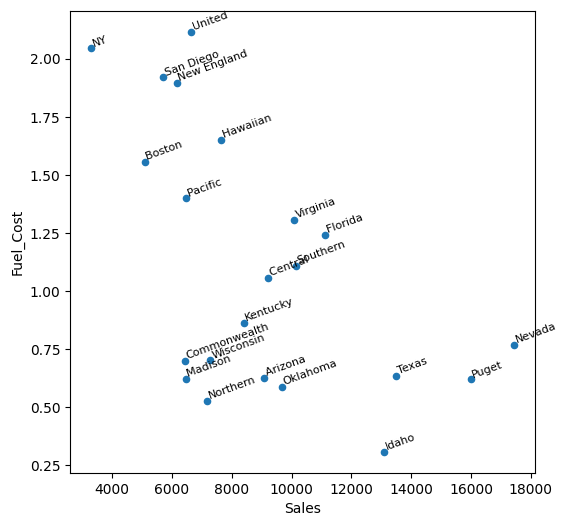

In [38]:
utilities_df = dmba.load_data('Utilities.csv')

ax = utilities_df.plot.scatter(x='Sales', y='Fuel_Cost', figsize=(6, 6))
points = utilities_df[['Sales','Fuel_Cost','Company']]
_ = points.apply(lambda x:
             ax.text(*x, rotation=20, horizontalalignment='left',
                     verticalalignment='bottom', fontsize=8), axis=1)

plt.show()

### 대용량 데이터셋으로 스케일 업하기
* 관측(행) 수가 많아 개별적인 관측치를 표시하는 플롯(산점도)이 비효과적일 때 대안
1. 샘플링: 표본을 랜덤하게 추출해 차트를 그린다.
2. 표시 크기를 줄인다.
3. 표시 색의 투명도를 사용한다.
4. 데이터를 구분해 서브셋을 만든다(다중 패널 사용)
5. 집계를 사용한다(거품 차트에서 거품 크기는 관측 건수에 비례)
6. 지터링을 사용한다(적은 양의 노이즈를 추가해 개별 표시를 짧게 이동)

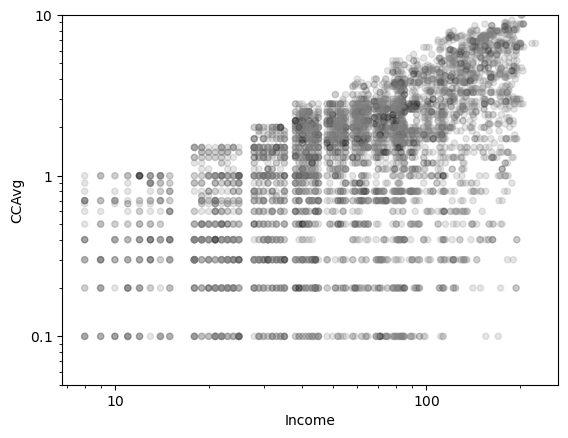

In [39]:
universal_df = dmba.load_data('UniversalBank.csv')

universal_df.plot.scatter(x='Income', y='CCAvg',
                          c=['black' if c == 1 else 'grey' for c in universal_df['Securities Account']],
                          ylim = (0.05, 10), alpha=0.2,
                          logx=True, logy=True)
plt.show()

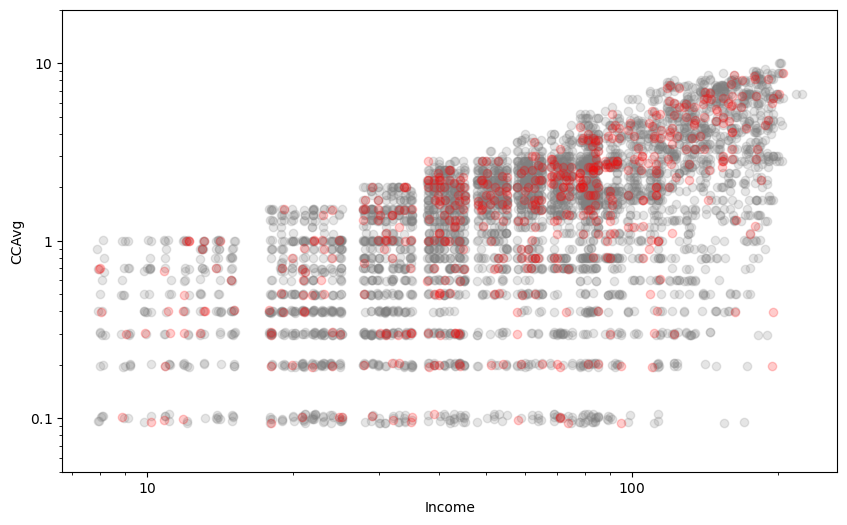

In [40]:
def jitter(x, factor=1):
    """ Add random jitter to x values """
    sx = np.array(sorted(x))
    delta = sx[1:] - sx[:-1]
    minDelta = min(d for d in delta if d > 0)
    a = factor * minDelta / 5
    return x + np.random.uniform(-a, a, len(x))


saIdx = universal_df[universal_df['Securities Account'] == 1].index

plt.figure(figsize=(10,6))
plt.scatter(jitter(universal_df.drop(saIdx).Income),
            jitter(universal_df.drop(saIdx).CCAvg),
            marker='o', color='grey', alpha=0.2)
plt.scatter(jitter(universal_df.loc[saIdx].Income),
            jitter(universal_df.loc[saIdx].CCAvg),
            marker='o', color='red', alpha=0.2)
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.ylim((0.05, 20))
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")

plt.show()

### 다변량 플롯: 평행 좌표
* 평행 좌표
    * 각 변수에 대응하는 수직 축이 하나씩 그려지고, 개별 관측들은 각 수직축 위에 있는 관측치를 연결하는 선으로 표현
    * 비지도학습 작업에 유용. 군집, 아웃라이어, 변수 간의 중복 정보를 가려내줌

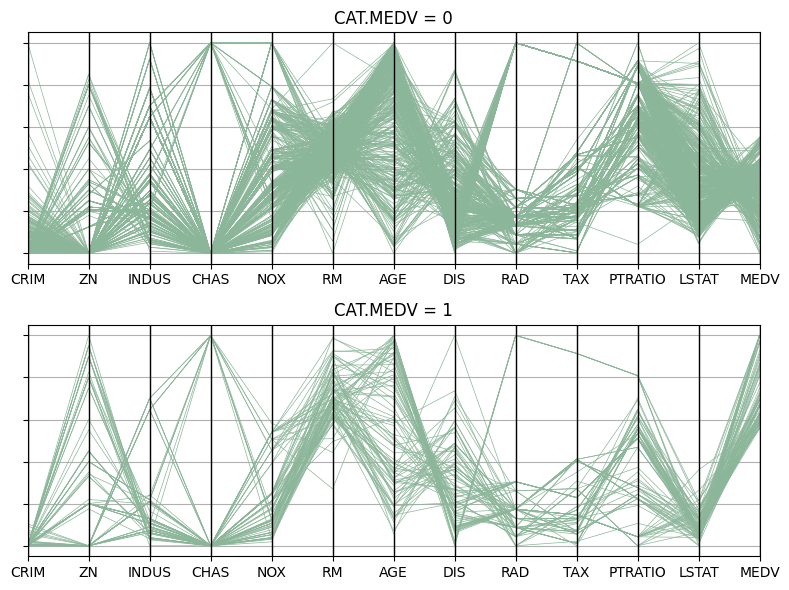

In [41]:
# Transform the axes, so that they all have the same range
min_max_scaler = preprocessing.MinMaxScaler()
dataToPlot = pd.DataFrame(min_max_scaler.fit_transform(housing_df),
                         columns=housing_df.columns)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[8, 6])
for i in (0, 1):
    parallel_coordinates(dataToPlot.loc[dataToPlot.CAT_MEDV == i],
                         'CAT_MEDV', ax=axes[i], linewidth=0.5)
    axes[i].set_title('CAT.MEDV = {}'.format(i))
    axes[i].set_yticklabels([])
    axes[i].legend().set_visible(False)

plt.tight_layout()  # Increase the separation between the plots

plt.show()

### 인터랙티브 시각화
1. 차트 변경이 쉽고 빠르며, 이전 상태로 복구할 수 있음
2. 관련 있는 다중 차트가 쉽게 결합되고, 한 화면에 표시 가능
3. 서로 연결되는 두 차트 중 한 차트에서 동작이 일어나면, 다른 쪽 차트에도 반영됨

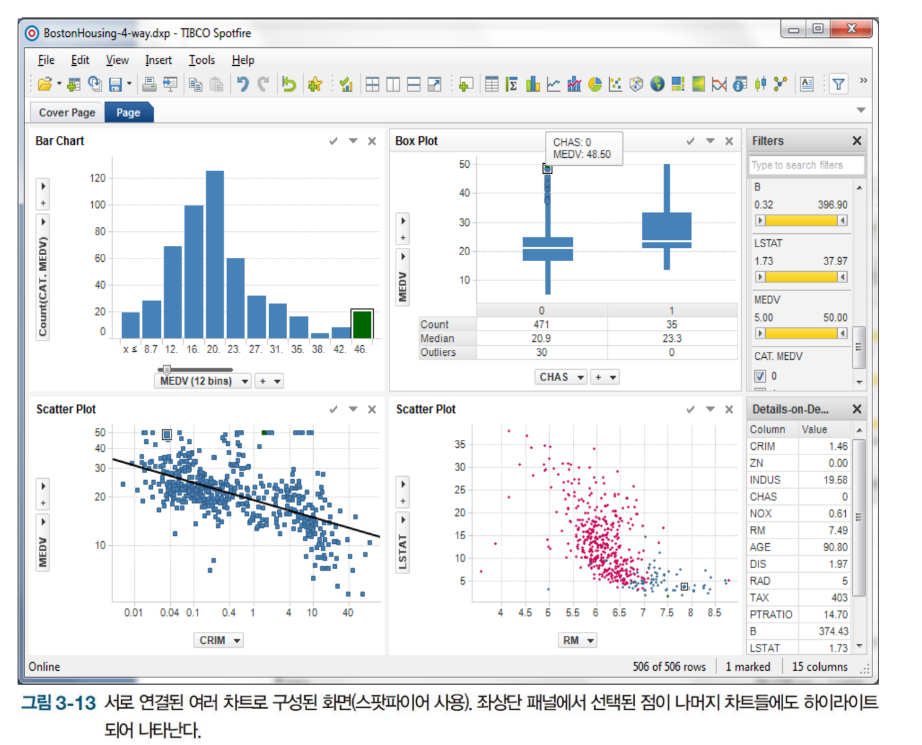

## 특수 시각화
### 네트워크 데이터의 시각화

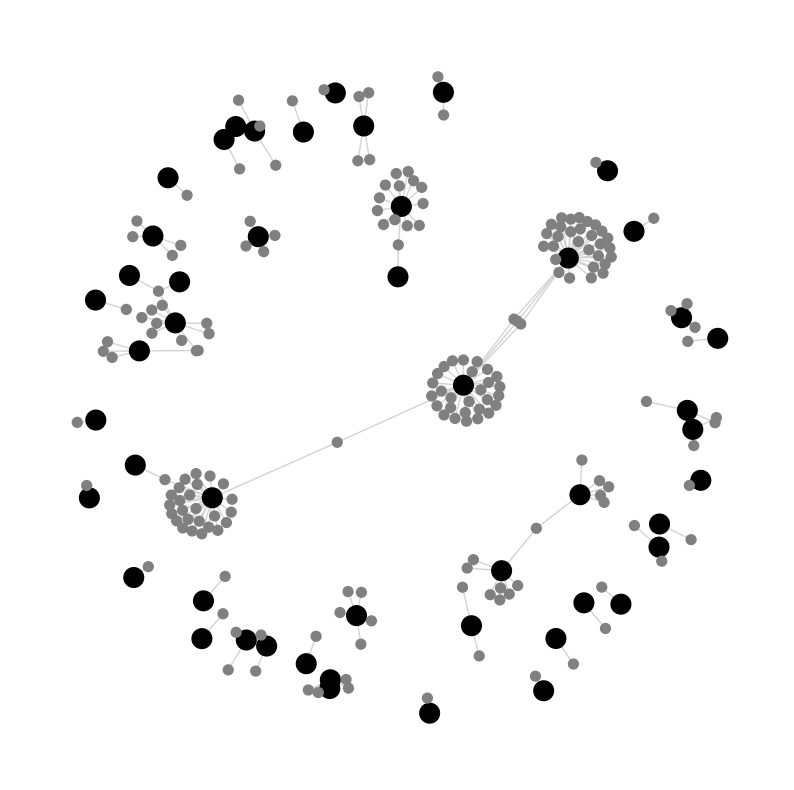

In [42]:
ebay_df = dmba.load_data('eBayNetwork.csv')

G = nx.from_pandas_edgelist(ebay_df, source='Seller', target='Bidder')

isBidder = [n in set(ebay_df.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 edge_color='lightgray',
                 node_color=['gray' if bidder else 'black' for bidder in isBidder],
                 node_size=[50 if bidder else 200 for bidder in isBidder])
plt.axis('off')

plt.show()

### 계층 데이터의 시각화: 트리맵

In [43]:
pip install squarify

  Obtaining dependency information for squarify from https://files.pythonhosted.org/packages/b7/3c/eedbe9fb07cc20fd9a8423da14b03bc270d0570b3ba9174a4497156a2152/squarify-0.4.4-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


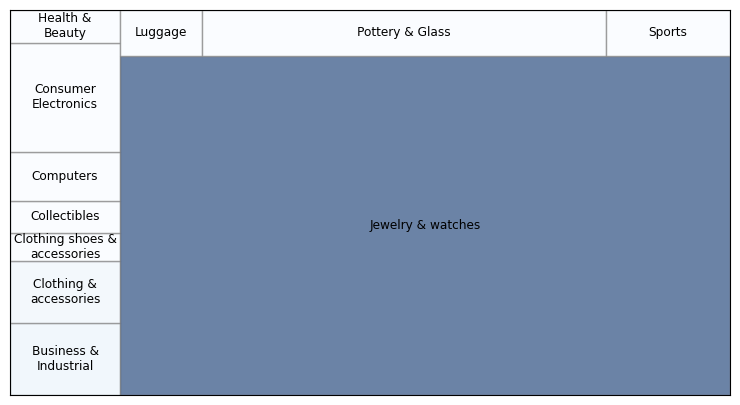

In [44]:
import squarify
import matplotlib

ebayTreemap = dmba.load_data('EbayTreemap.csv')

grouped = []
for category, df in ebayTreemap.groupby('Category'):
    negativeFeedback = sum(df['Seller Feedback'] < 0) / len(df)
    grouped.append({
        'category': category,
        'negativeFeedback': negativeFeedback,
        'averageBid': df['High Bid'].mean()
    })
byCategory = pd.DataFrame(grouped)

norm = matplotlib.colors.Normalize(vmin=byCategory.negativeFeedback.min(), vmax=byCategory.negativeFeedback.max())
colors = [matplotlib.cm.Blues(norm(value)) for value in byCategory.negativeFeedback]

fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

renameCategories = {
    'Business & Industrial': 'Business &\nIndustrial',
    'Health & Beauty': 'Health &\nBeauty',
    'Consumer Electronics': 'Consumer\nElectronics',
    'Clothing & accessories': 'Clothing &\naccessories',
    'Clothing shoes & accessories': 'Clothing shoes &\naccessories'
}
labels = [renameCategories.get(c, c) for c in byCategory.category]

squarify.plot(label=labels, sizes=byCategory.averageBid, color=colors,
              ax=ax, alpha=0.6, edgecolor='grey', text_kwargs={'fontsize': 8.7})

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.subplots_adjust(left=0.1)
plt.show()
# labels

### 공간 정보 데이터의 시각화: 맵 차트

In [45]:
if 'GMAPS_API_KEY' in os.environ:
    import gmaps
    SCstudents = dmba.load_data('SC-US-students-GPS-data-2016.csv')

    gmaps.configure(api_key=os.environ['GMAPS_API_KEY'])
    fig = gmaps.figure(center=(39.7, -105), zoom_level=3)
    fig.add_layer(gmaps.symbol_layer(SCstudents, scale=2,
                                     fill_color='red', stroke_color='red'))
    fig

In [46]:
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import dmba

%matplotlib inline

In [47]:
pip install cartopy

  Obtaining dependency information for cartopy from https://files.pythonhosted.org/packages/4f/ce/ba4baced164ecd78b4109cd611d7b64d256f012784e944c1b0f6f5dff5c1/Cartopy-0.24.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=1.8 from https://files.pythonhosted.org/packages/b1/5a/6a67d929c467a1973b6bb9f0b00159cc343b02bf9a8d26db1abd2f87aa23/shapely-2.0.6-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyshp>=2.3 from https://files.pythonhosted.org/packages/98/2f/68116db5b36b895c0450e3072b8cb6c2fac0359279b182ea97014d3c8ac0/pyshp-2.3.1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     --------------------------- ---------- 41.0/56.0 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 291.3 kB/s eta 0:00:

In [48]:
import warnings
from cartopy.io import DownloadWarning


c:\Users\sdh05\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


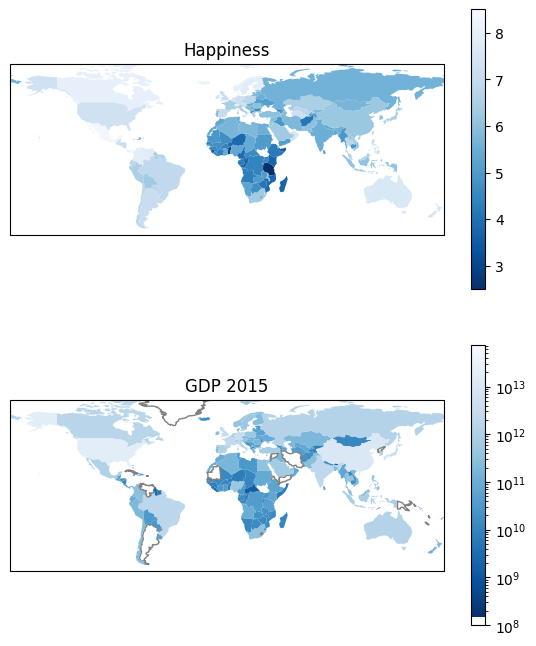

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

gdp_df = dmba.load_data('gdp.csv', skiprows=4)
gdp_df = gdp_df.rename(columns={'2015': 'GDP2015'})
gdp_df = gdp_df.set_index('Country Code')  # use the three letter country code to access rows

# The file contains a column with two letter combinations, use na_filter to avoid converting
# the combination NA into not-a-number
happiness_df = dmba.load_data('Veerhoven.csv', na_filter = False)
happiness_df = happiness_df.set_index('Code')  # use the country name to access rows


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), subplot_kw={"projection": ccrs.PlateCarree()})
ax1.set_extent([-150, 60, -25, 60])
ax2.set_extent([-150, 60, -25, 60])

# Create a color mapper
cmap = plt.cm.Blues_r
norm1 = matplotlib.colors.Normalize(vmin=happiness_df.Score.dropna().min(),
                                    vmax=happiness_df.Score.dropna().max())
norm2 = matplotlib.colors.LogNorm(vmin=gdp_df.GDP2015.dropna().min(),
                                  vmax=gdp_df.GDP2015.dropna().max())

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for country in countries:
    countryCode = country.attributes['ADM0_A3']
    if countryCode in gdp_df.index:
        if pd.isna(gdp_df.loc[countryCode].GDP2015):
            ax2.add_geometries([country.geometry], ccrs.PlateCarree(),
                                edgecolor='grey', facecolor='white')
        else:
            ax2.add_geometries([country.geometry], ccrs.PlateCarree(),
                                facecolor=cmap(norm2(gdp_df.loc[countryCode].GDP2015)))
    # check various attributes to find the matching two-letter combinations
    nation = country.attributes['POSTAL']
    if nation not in happiness_df.index:
        nation = country.attributes['ISO_A2']
    if nation not in happiness_df.index:
        nation = country.attributes['WB_A2']
    if nation not in happiness_df.index and country.attributes['NAME'] == 'Norway':
        nation = 'NO'
    if nation in happiness_df.index:
        ax1.add_geometries([country.geometry], ccrs.PlateCarree(),
                           facecolor=cmap(norm1(happiness_df.loc[nation].Score)))

ax2.set_title("GDP 2015")
sm = plt.cm.ScalarMappable(norm=norm2, cmap=cmap)
cb = plt.colorbar(sm, ax=ax2)
cb.set_ticks([1e8, 1e9, 1e10, 1e11, 1e12, 1e13])

ax1.set_title("Happiness")
sm = plt.cm.ScalarMappable(norm=norm1, cmap=cmap)
cb = plt.colorbar(sm, ax=ax1)
cb.set_ticks([3, 4, 5, 6, 7, 8])


plt.show()